# Linearity of SiPMs

Here I agrue that we may not understand the linearity of the SiPMs used in the FoCAL-H prototypes. 

## The layout

First, let us describe the layout.   

We have a silicon sensor of size $w\times h$ segmented into $M\times N$ cells.  Thus, each cell is $\Delta_w\times\Delta_h)=w/M\times h/N$ big.  See also the plot below.

In [1]:
from matplotlib import rcParams 

rcParams['figure.max_open_warning'] = 0
rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
rcParams['font.family'] = ['serif']
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['axes.formatter.use_mathtext'] = True

def hmeasure(ax,x1,x2,y,dy,text,**kwargs):
    color = kwargs.get('color','k')
    ax.plot([x1,x1,x2,x2],
            [y+dy,y,y,y+dy],
            **kwargs)
    ax.annotate(text,((x2+x1)/2,y),
                va='top' if dy < 0 else 'bottom',
                ha='center',color=color)
def vmeasure(ax,y1,y2,x,dx,text,**kwargs):
    color = kwargs.get('color','k')
    ax.plot([x+dx,x,x,x+dx],
            [y1,y1,y2,y2],
            **kwargs)
    ax.annotate(text,(x,(y2+y1)/2),
                ha='right' if dx < 0 else 'left',
                va='center',rotation='vertical',color=color)
    
def drawSensor(w=10,h=10,N=10,M=10,annotate=True):
    from matplotlib.pyplot import gca 
    
    ls = '--'
    ax = gca()
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.plot([0,0,w,w,0],[0,h,h,0,0],color='k')
    dw = w / M 
    dh = h / N
    for i in range(1,M):
        ax.plot([dw*i,dw*i],[0,h],ls=ls,color='C0')
    for i in range(1,N):
        ax.plot([0,w],[dh*i,dh*i],ls=ls,color='C0')
        
    if annotate:
        hmeasure(ax,0,w,-dh/2,-dh/2,'$w$ and $M$ columns',color='C0',ls=ls)
        vmeasure(ax,0,h,-dw/2,-dw/2,'$h$ and $N$ rows',   color='C0',ls=ls)
        hmeasure(ax,(M//2)*dw,(M//2+1)*dw,h+dh/2,dh/2,r'$\Delta_w$',color='C0',ls=ls)
        vmeasure(ax,(N//2)*dh,(N//2+1)*dh,w+dw/2,dw/2,r'$\Delta_h$',color='C0',ls=ls)
    
    return ax

In [2]:
drawSensor();

Furthermore, the chip is operated in Gieger mode which means that any electron-hole pair generated in the silicon will generate an avalanche of electron-hole pairs, and no matter the energy deposited in a single cell, the signal (current) from a cell will always have the same amplitude.  This in turn means that each of the $M\times N$ cells _either_ has a signal _or_ it does not.   That is, the output of each cell is either a '0' or a '1'. 
  
To get an amplitude from a sensor we add up the '0's and '1's from each cell, and we get a signal, from each chip, in the range from $0$ to $M\times N$. 

Each sensor is exposed to light from $p$ optical fibres.  For simpllicity sake, but without loss of generality, let us assume the fibres are organised in a grid as an $m\times n$ matrix, where $m<M$ and $n<N$.   Let us also assume that the fibres are wholly contained within the silicon chip, so that the fibres can be thought of as $\delta_w\times\delta_h=w/m\times h/n$ large rectangles.

> In real life, the fibres are round with a diameter of $r$, and naturally pack into a hexagon grid.  Furthermore, the light emitted by each fibre diffuses a bit over the distance travled from the end of the fibre to the surface of the chip, so the approximation of considering the fibres rectangles that covers the entire surface of the chip, is somewhat justified. 

See also the plot below. 

In [3]:
def drawSensorFibres(w=10,h=10,M=10,N=10,m=3,n=3,annotate=True):
    ls = '-.'
    ax = drawSensor(w,h,M,N,annotate=annotate)
    dw = w / m
    dh = h / n
    for i in range(0,m):
        for j in range (0,n):
            ax.plot([i*dw,i*dw,(i+1)*dw,(i+1)*dw,i*dw],
                    [j*dh,(j+1)*dh,(j+1)*dh,j*dh,j*dh],
                     ls=ls,color='C1')
            
    dW = w / M
    dH = h / N
    
    if annotate:
        hmeasure(ax,0,w,-3*dH/2,-dH/2,'$n$ columns',color='C1',ls=ls)
        vmeasure(ax,0,h,-3*dW/2,-dW/2,'$m$ columns',color='C1',ls=ls)
        hmeasure(ax,(n//2)*dw,(n//2+1)*dw,h+3*dH/2,dH/2,r'$\delta_w$',color='C1',ls=ls)
        vmeasure(ax,(m//2)*dh,(m//2+1)*dh,w+3*dW/2,dW/2,r'$\delta_h$',color='C1',ls=ls)

In [4]:
drawSensorFibres()

## One-dimensional model 

Let us now consider a somewhat simpler problem in one dimension. While simpler, it directly translates to the two-dimensional case.  

We consider a sensor of width $w$ segmented into $N$ cells, and exposed to light from $n$ fibres.   See the plot below for an illustration.

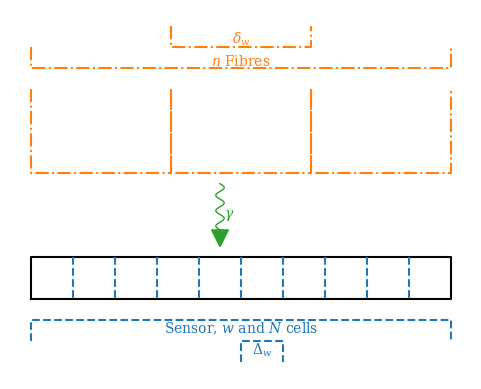

In [5]:
def curly_arrow(ax, start, end, arr_size = 2, n = 5, color='gray', linew=1, width = 0.1):
    '''From https://stackoverflow.com/a/50918519'''
    
    from numpy import linspace, sin, sqrt, arctan2, pi, array
    from matplotlib.pyplot import Line2D
    from matplotlib.transforms import Affine2D
    from matplotlib.path import Path
    from matplotlib.patches import PathPatch
    
    xmin, ymin = start
    xmax, ymax = end
    ascale     = width * arr_size
    alen       = 2 * ascale
    dist       = sqrt((xmin - xmax)**2 + (ymin - ymax)**2)-alen
    n0         = dist / (2 * pi)
    
    x    =  linspace(0, dist, 151)
    y    =  width * sin(n * x / n0) + ymin
    x    += xmin
    line =  Line2D(x,y, color=color, lw=linew)
    
    del_x = xmax - xmin
    del_y = ymax - ymin
    ang   = arctan2(del_y, del_x)
    
    line.set_transform(Affine2D().rotate_around(xmin, ymin, ang) + ax.transData)
    
    verts      =  array([[-2,1],[-2,-1],[0,0],[-2,1]]).astype(float) * ascale
    verts[:,1] += ymax
    verts[:,0] += xmax
    path       =  Path(verts)
    patch      =  PathPatch(path, fc=color, ec=color)

    patch.set_transform(Affine2D().rotate_around(xmax, ymax, ang) + ax.transData)
    return line, patch

def drawPhoton(ax,x,y1=0,dy=1.5,amplitude=.1,annotate=False):
    l, h = curly_arrow(ax,(x,y1+dy),(x,y1),width=amplitude,color='C2',n=3)
    ax.add_line(l)
    ax.add_patch(h)
    
    if annotate:
        ax.annotate(r'$\gamma$',(x+amplitude,(y1+dy/2)),
                    color='C2',va='center',ha='left')

def draw1DSensorFibres(w=10,N=10,n=3,d=1,annotate=True):
    from matplotlib.pyplot import gca 
        
    ax = gca()
    ax.set_aspect(1)
    ax.set_axis_off()
    
    ax.plot([0,0,w,w,0],
            [-d,0,0,-d,-d],
            color='k')
    dW  = w / N
    cls = '--'
    for i in range(1,N):
        ax.plot([i*dW,i*dW],[0,-d],color='C0',ls=cls)
        
    dw  = w / n
    fls = '-.'
    for i in range(n):
        ax.plot([i*dw,i*dw,(i+1)*dw,(i+1)*dw],
                [4*d,2*d,2*d,4*d],color='C1',ls=fls)
        
    if annotate:
        hmeasure(ax,0,w,-3*d/2,-d/2,'Sensor, $w$ and $N$ cells',    color='C0',ls=cls)
        hmeasure(ax,(N//2)*dW,(N//2+1)*dW,-4*d/2,-d/2,r'$\Delta_w$',color='C0',ls=cls)
        hmeasure(ax,0,w,9*d/2,d/2,'$n$ Fibres',                     color='C1',ls=fls)
        hmeasure(ax,(n//2)*dw,(n//2+1)*dw,10*d/2,d/2,r'$\delta_w$', color='C1',ls=fls)
    
    return ax
    
def draw1DSensorFibresPhotons(xs,w=10,N=10,n=3,amplitude=.1,annotate=True,annotate_gamma=False):
    '''X are fractions of w'''
    d  = w / N
    ax = draw1DSensorFibres(w=w,N=N,n=n,d=d,annotate=annotate)
    
    amp = min(max(amplitude,1/len(xs)),d/10)
    #print(f'Input amplitude {amplitude}, min={d/4}, max={1/len(xs)} calculated={amp}')
    for x in xs:
        #ax.plot(x*w,.25,'or')
        drawPhoton(ax,x=x*w,y1=d/4,dy=3*d/2,amplitude=amp,annotate=annotate_gamma)
    
draw1DSensorFibresPhotons([.45],annotate_gamma=True)

### Uniform illumination 

If we shine a (laser) light on the fibres, then all fibres will be evenly illuminated (to first order), and the emission at the end of the fibres (towards the chip) will be uniform.    The plot below illustrates this in the case of full illumination. 

In [6]:
def uniformIllumination(ngamma,w=10,N=10,n=3,nFibres=None):
    from numpy import linspace
    dx = 1/ngamma
    xs = linspace(dx/2,1.0-dx/2,ngamma,endpoint=True)
    draw1DSensorFibresPhotons(xs,w=w,N=N,n=n,annotate=False)

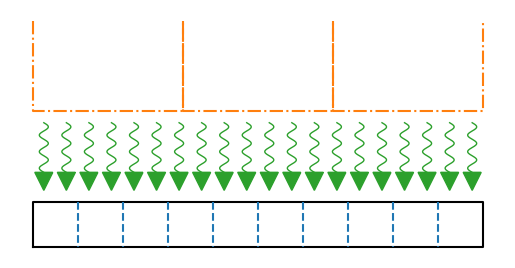

In [7]:
uniformIllumination(20)

In the above case, all $N$ cells of the chip are illuminated by _at least_ one photon, and so all cells will give out a '1', _irrespective_ of the actual number of photons that hit the cells.   Thus, the signal in this case is $N$. 

We can of course turn down the intensity of the light we shine on the fibres.  The fibres will still be more or less uniformly illuminated and thus the light emitted from the fibres more or less uniformly distributed over the sensor. This is illustrated below. 

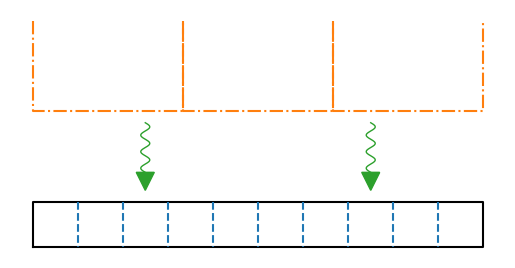

In [8]:
uniformIllumination(2)

In this example, only every fifth cell is illuminated, and thus every fifth cell will give out a '1' meaning the signal from the sensor in this case is $N/5$. 

### Focus illumination 

Now let us consider a different case.  Here we assume that all light that hits the sensor originates from a single fiber.  

In [9]:
def focusedIllumination(ngamma,w=10,N=10,n=3,nFibres=1):
    from numpy import linspace
    dx = 1/ngamma
    dW = 1/n
    if dx >= dW:
        dx = dW / ngamma
    x1 = dW+dx/2
    x2 = (nFibres+1)*dW-dx/2
    xs = linspace(x1,x2,ngamma,endpoint=True)
    draw1DSensorFibresPhotons(xs,w=w,N=N,n=n,annotate=False)

In [10]:
focusedIllumination(20)

Here we have the same number of photons hitting the sensor as the second previous example.  However, in this case, only a fraction of the cells are illuminated, namely $\lceil N/n\rceil$, meaning the signal from the sensor will be $\lceil N/n\rceil$. 

Now let's turn down the intensity again to the same as the next to previous example, but again originating from the same fibre. 

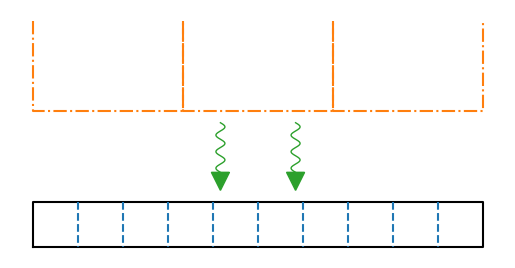

In [11]:
focusedIllumination(2)

Here, only a subset of the cells are illuminated, and so the signal will be $N/5$ as before. 


We can summarise the above in a table

| Illumination | $N_{\gamma}=\text{full}$      | $N_{\gamma}=\text{reduced}$        |
|--------------|--------------------|----------------------|
| Uniform      | $N$                | $N/5$                |
| Focused      | $\lceil N/n\rceil$ | $N/5$                |


This illustrates that _if_ the light emmitted from the fibres is relatively focused, or originating from a few fibres, then the signal from the sensor will be saturated, simply because each cell only ever reports a '0' or '1' and the signal is the sum over these '0's and '1's. 

In the above examples, we used a relatively coarse segmentation and a very focused origin of photons (a single fibre) in the latter cases.  But it is easy to see how this generalises to finer segmentations as illustrated below 

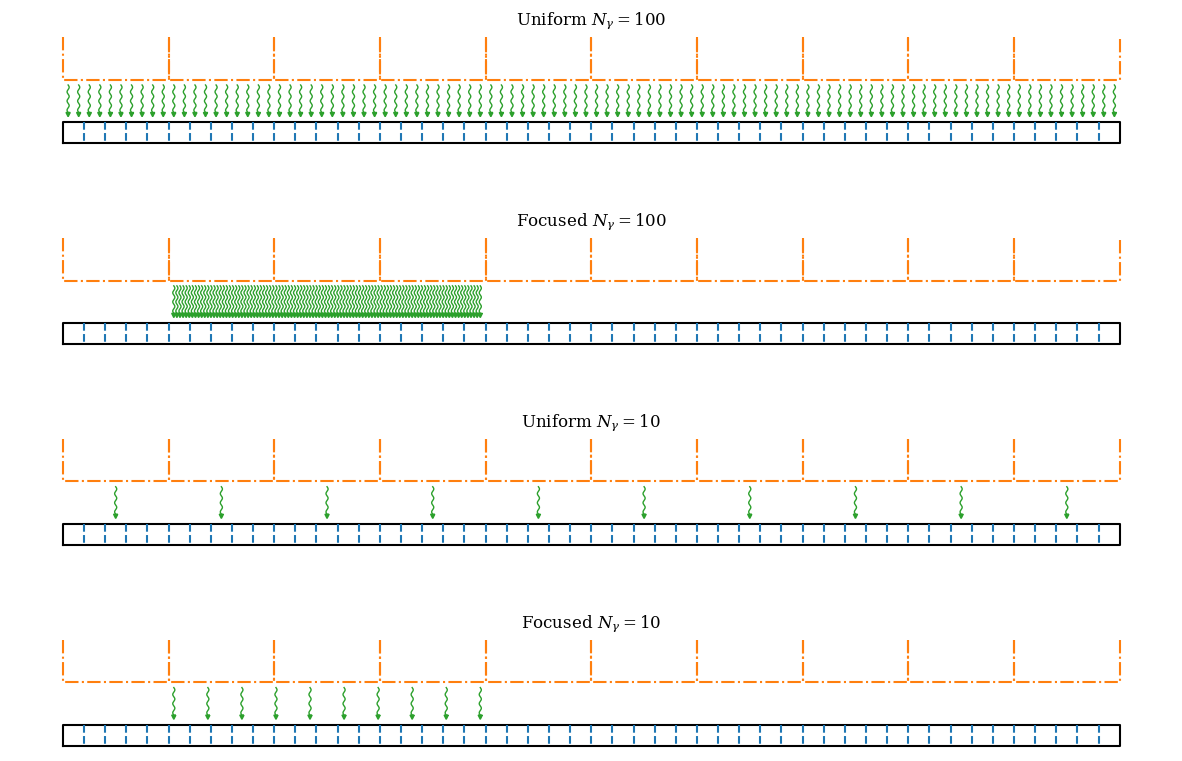

In [12]:
from matplotlib.pyplot import subplots, sca

fig, ax = subplots(ncols=1,nrows=4,figsize=(15,10))
ax = ax.reshape(2,2)
for row,ngamma in zip(ax,[100,10]):
    for cell,func,what in zip(row,
                             [uniformIllumination,focusedIllumination],
                             ['Uniform','Focused']):
        sca(cell)
        func(ngamma,w=100,N=50,n=10,nFibres=3)
        cell.set_title(fr'{what} $N_{{\gamma}}={ngamma}$')

## Numerical model

To see what this means in terms of signal distributions, we will build a numerical model.  We need 

- A model of the sensor.  Presented with a set of $x$ coordinates, corresponding to impinging photons, it must calculate the response of the sensor.   Essentially what we need to do is to histogram the $x$ values according to the segmentation of the sensor, and then count how many bins have a non-zero signal.  That is, we are counting bins with counts in them, _not_ the integral of counts. 
- A model of the fibres.  Given a number of photons to emit, then this model must give out that number of $x$ positions, possibly randomly distributed over some number of fibres. 

The first model is really simple.  We assume the chip covers the range $x\in[-1,1]$ to make life simpler further down the line.  

In [13]:
def sensor(x,N,eff=1,cutoff=0):
    from numpy import linspace, histogram, asarray
    from numpy.random import uniform
    xa     = asarray(x)
    detect = uniform(size=len(xa)) <= eff 
    imping = xa * detect
    bins   = linspace(-1,1,N+1)
    hist,_ = histogram(imping,bins=bins)
    digit  = hist > cutoff
    #print(hist,digit)
    return digit.sum()

Note that we have introduced an efficiency parameter `eff` which allows us to simulate the detection efficiency should we want to.  Essentially, we draw a uniform random number for each input $x$ and compare that to the efficiency. If the random number is smaller or equal to the efficiency, then that input is accepted. 

Let us do a little test of this, but before that we do that we make a function to generate a _specific_ number of random numbers within a given range.  

In [14]:
def ensureSample(wanted,pdf,low,high,maxtry=20):
    from numpy import asarray, logical_and, concatenate
    
    ret = asarray([])
    for trial in range(maxtry):
        d = pdf(size=int(1.2*wanted)-len(ret))
        d = d[logical_and(d<=high,d>=low)]
        ret = concatenate((ret,d))
        
        if len(ret) >= wanted:
            return ret[:wanted]
        
    raise RuntimeError(f'Failed to produce {wanted} gammas in {maxtry} tries')

We also want to make a "distribution" which always gives us evenly spaced observations 

In [15]:
def evenly(ngamma,low,high):
    from numpy import linspace 
    
    return linspace(low,high,ngamma)

Now we do our test 

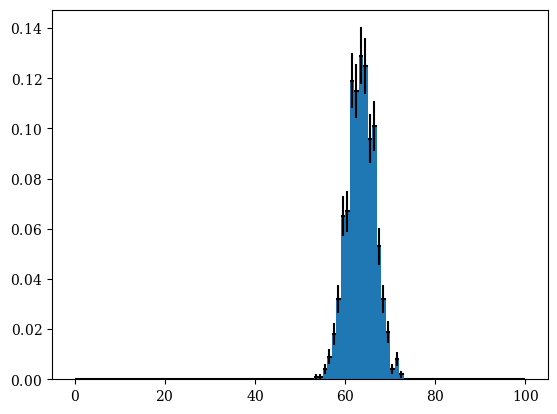

In [16]:
def histogramAndPlot(x,low,high,n,normalize=True,**kwargs):
    from nbi_stat import histogram, plot_hist
    from numpy import linspace 

    h = histogram(x,linspace(low,high,n+1),normalize=normalize)
    plot_hist(*h,as_bar=True,**kwargs)

from numpy.random import uniform, normal
    
#sample = lambda : uniform(-1,1,100)
sample = lambda : ensureSample(100,normal,-1,1)
#sample = lambda : evenly(100,-1,1)
histogramAndPlot([sensor(sample(),N=100) for _ in range(1000)],0,100,100)

Now let us do the model of the fibres.  Again, we assume a maximum range of $[-1,1]$, but we will allow that to be further restricted e.g., $[l,h]$ where $-1<l<h<1$.  We will also accept a PDF function to generate our $x$ distributions.  We want to ensure that exactly the number of requested photons are generated, so we loop until we have got enough points. 

In [17]:
def fibres(ngamma,low=-1,high=1,pdf=None,maxtry=100):
    from numpy import isclose
    
    # Flip if in wrong order 
    if low > high: low, high = high, low 
    # Limit to [-1,1]
    low  = min(max(-1,low),1)
    high = max(min(1,high),-1)
    # Check bounds 
    if isclose(low,high):
        raise RuntimeError(f'Invalid range [{low},{high}]')
        
    if pdf is None:
        pdf = lambda ngamma : evenly(ngamma,low,high)
        
    
        
    ret = ensureSample(ngamma,pdf,low,high,maxtry)
    return ret

Let us do a small test where our input PDF is a normal distribtion.

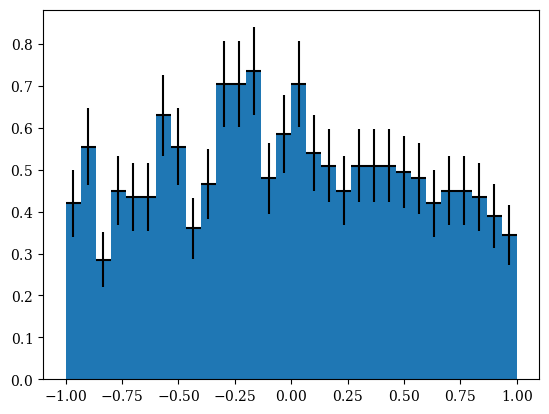

In [18]:
from numpy.random import normal

histogramAndPlot(fibres(1000,pdf=normal),-1,1,30)

Let us also do a test with a uniform distribution between $[-.1,.1]$

In [19]:
histogramAndPlot(fibres(1000,pdf=lambda size:uniform(-.1,.1,size=size)),-1,1,30)

Let us now define an overall simulation.   What we will do is that we will define the segmentation of the sensor to be $N$, and then, for increasing number of photons, we will generate photons and then either illuminate the cells more or less uniformly or more focused.  The simulation will then return a two-dimensional array of $N_{\mathrm{event}}$ rows and three columns: The number of generated photons, the measured signal when the photons illuminate the whole sensor, and the measured signal when only a subset of the cells are illuminated.  The function will 
- accept an array of the number of photons to create $N_{\gamma}$
- how many events per number of photons $N_{\mathrm{event}}$ 
- a segmentation of the sensor $N$ 
- two PDFs - one for the even illumination and one for the focused illumination. 

In [20]:
def simulate(ngamma,nev,N,widePdf,narrowPdf,eff=1,cutoff=0):
    from numpy import array, concatenate, vstack, asarray
    
    sens = lambda x : sensor(x,N=N,eff=eff,cutoff=cutoff)
    
    ret = None
    for ng in ngamma:
        dng = [[ng, 
                sens(fibres(ng,pdf=widePdf)),
                sens(fibres(ng,pdf=narrowPdf))]
                for _ in range(nev)
              ]
        if ret is None:
            ret = dng
        else:
            ret += dng 
    return asarray(ret)

Let us run a simple test and show the result

In [21]:
from IPython.display import Markdown

test = simulate([1,10,100,1000],1,100,
             lambda size : uniform(-1,1,size=size),
             lambda size : uniform(-.1,.1,size=size))
txt = r'''
| $N_{\gamma}$ | Wide | Narrow |
|--------------|------|--------|
'''
for row in test: 
    txt += '|'+'|'.join([str(cell) for cell in row]) + '|\n'
    
Markdown(txt)


| $N_{\gamma}$ | Wide | Narrow |
|--------------|------|--------|
|1|1|1|
|10|9|8|
|100|66|10|
|1000|100|10|


Rather than using uniform distributions, we can use a normal distribution for the wide distribution, and a Cauchy distribution, with a small scale parameter, for the narrow distribution.  This has the benefit that we effectively will have a "background" in the narrow distribution, and that the wide distribution has soft edges.  

We define two short hands for these random number distributions 

In [22]:
def normal_rv(size,width=.5):
    from numpy.random import normal 
    
    return normal(size=size,scale=width)

def cauchy_rv(size,width=.05):
    from numpy.random import standard_cauchy
    
    return standard_cauchy(size=size)*width

def uniform_rv(size,width=2):
    from numpy.random import uniform
    
    return uniform(-width/2,width/2,size=size)

Let us plot these two distributions 

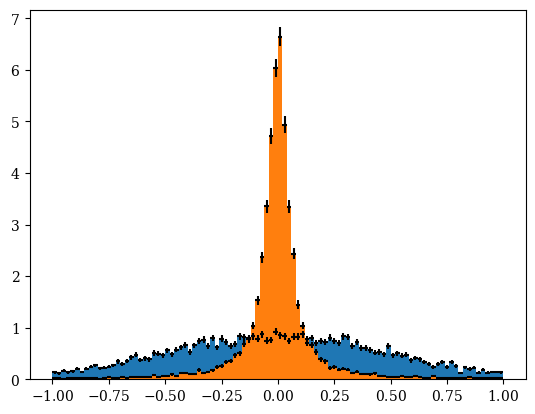

In [23]:
histogramAndPlot(normal_rv(size=10000),-1,1,100)
histogramAndPlot(cauchy_rv(size=10000),-1,1,100)

### A run

We will run our simulation with the following parameters 

- We segment the sensor into $N=100$ cells 
- For the number photons we use a geometric series from 10 to 200 in 20 steps
- For each number of photons we will generate $N_{\mathrm{event}}=100$
- For the wide distribution we will use a normal distribution with a width ($\sigma$) of 1 
- For the narrow distribution we will use a Cauchy distribution with a width of 0.02. 

In [24]:
from numpy import geomspace

mingam = 20
maxgam = 200
eff    = 1
cutoff = 0
ncell  = 100
nev    = 100
lgamma = 10
ngamma = geomspace(mingam,maxgam,lgamma,dtype=int)
pdfs   = normal_rv,cauchy_rv
#pdfs   = lambda size:normal_rv(size=size,width=2),lambda size:normal_rv(size=size,width=.01)
#pdfs   = normal_rv,lambda size: uniform_rv(size,width=.2)
#pdfs   = uniform_rv, lambda size: uniform_rv(size,width=.2)

data = simulate(ngamma,nev,ncell,*pdfs,eff=eff,cutoff=cutoff)

Let us plot the wide and narrow observations against each other 

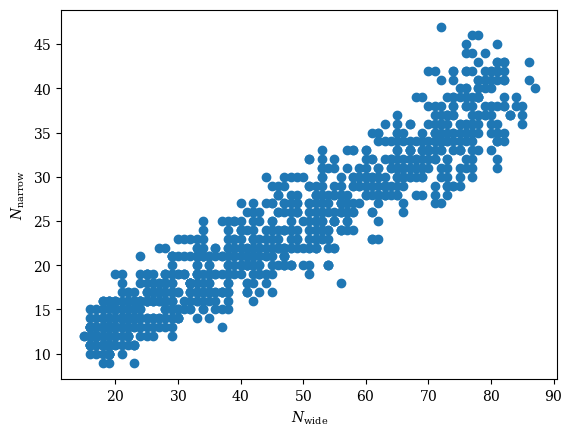

In [25]:
def drawScatter(data,idx1=1,idx2=2):
    from matplotlib.pyplot import gca 

    tit = {0: r'$N_{\gamma}$',
           1: r'$N_{\mathrm{wide}}$',
           2: r'$N_{\mathrm{narrow}}$'}
    ax = gca()
    ax.scatter(data[:,idx1],data[:,idx2])
    ax.set_xlabel(tit[idx1])
    ax.set_ylabel(tit[idx2]);
    
drawScatter(data)

In [26]:
drawScatter(data,0,1)

In [27]:
drawScatter(data,0,2)

Another way to visualise the difference, is to calculate the mean and standard deviation for each fixed $N_{\gamma}$ and then plot that for the wide and narrow sources.  We also plot $\mathrm{sd}(N)/\bar{N}$. 

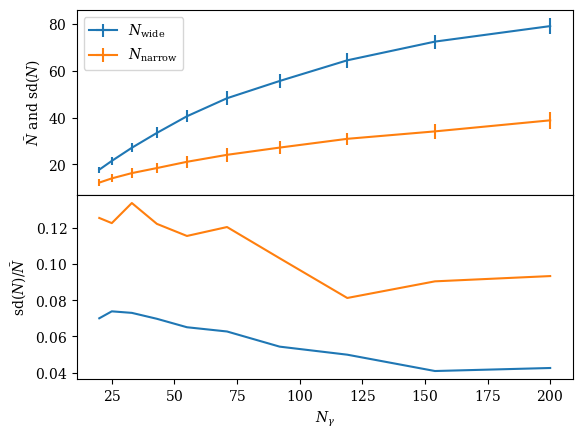

In [28]:
def meanStd(data,idx,nev):
    from numpy import asarray, sqrt 
    x  = asarray([data[i:i+nev,  0].mean()          for i in range(0,len(data),nev)])
    xe = asarray([data[i:i+nev,  0].std()/sqrt(nev) for i in range(0,len(data),nev)])
    y  = asarray([data[i:i+nev,idx].mean()          for i in range(0,len(data),nev)])
    ye = asarray([data[i:i+nev,idx].std()           for i in range(0,len(data),nev)])
    return x, xe, y, ye

def drawMeanStd(data,nev=nev):
    xw,ew,yw,sw = meanStd(data,1,nev=nev)
    xn,en,yn,sn = meanStd(data,2,nev=nev)
    #print(sw)
    #print(sn)

    fig, ax = subplots(nrows=2,sharex=True,gridspec_kw={'hspace':0})
    #ax[0].set_yscale('log')
    #ax[0].set_xscale('log')
    ax[0].errorbar(xw,yw,sw,ew,label=r'$N_{\mathrm{wide}}$')
    ax[0].errorbar(xn,yn,sn,en,label=r'$N_{\mathrm{narrow}}$')
    ax[0].set_ylabel(r'$\bar{N}$ and $\mathrm{sd}(N)$')
    ax[1].plot(xw,sw/yw,label=r'$N_{\mathrm{wide}}$')
    ax[1].plot(xn,sn/yn,label=r'$N_{\mathrm{narrow}}$')
    ax[1].set_ylabel(r'$\mathrm{sd}(N)/\bar{N}$')
    ax[1].set_xlabel(r'$N_{\gamma}$')
    #ax[1].set_ylim(0,.2)
    ax[0].legend();
    
drawMeanStd(data)

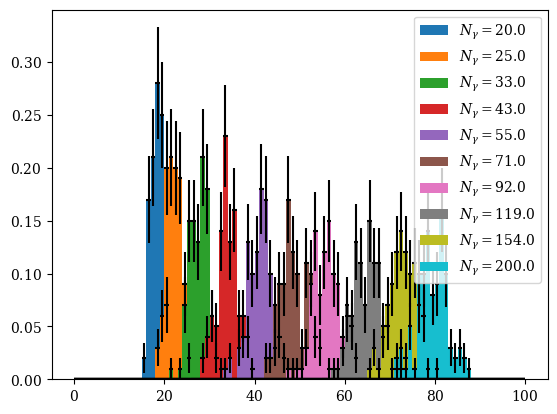

In [29]:
def drawDists(data,idx,nev=nev,ncell=ncell,xmax=ncell):
    from numpy import asarray, sqrt 
    from matplotlib.pyplot import gca 
    
    ax  = gca()
    
    x   = asarray([data[i:i+nev,  0].mean()          for i in range(0,len(data),nev)])
    xe  = asarray([data[i:i+nev,  0].std()/sqrt(nev) for i in range(0,len(data),nev)])
    sub = asarray([data[i:i+nev,idx]                 for i in range(0,len(data),nev)])
    for s,xm,ee in zip(sub,x,xe): 
        histogramAndPlot(s,0,xmax,int(xmax),normalize=True,label=fr'$N_{{\gamma}}={xm}$')
        #break
        
    ax.legend()    

drawDists(data,1)

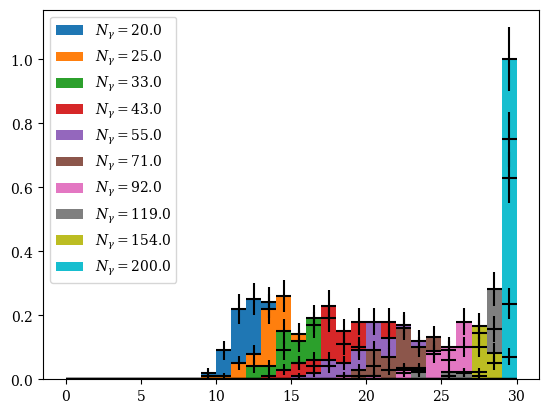

In [30]:
drawDists(data,2,xmax=50)

However, since the number of photons is fixed, this is _not_ the same as the resolution parameter typically calculated.  To simulate that, we need to $N_{\gamma}$ as random variable i.e., distributed according to some probability distribution.  

We therefore modify our simulation so that the number of photons $N_{\gamma}$ is not fixed, but rather is distributed according to some PDF.  Our new simulation function is similar to the previous one, except, 

- it accepts a two dimensional array of $N_{\gamma}$ where each row corresponds to a fixed set of parameters for the $N_{\gamma}$ distribution, for example, the mean and standard deviation, and each column in a row is the random $N_{\gamma}$ to produce. 

In [31]:
def rsimulate(ngamma,N,widePdf,narrowPdf,eff=eff,cutoff=cutoff):
    from numpy import array, concatenate, vstack, asarray
    
    sens = lambda x : sensor(x,N=N,eff=eff,cutoff=cutoff)
    
    ret = None
    for row in ngamma:
        dng = [[ng, 
                sens(fibres(ng,pdf=widePdf)),
                sens(fibres(ng,pdf=narrowPdf))]
                for ng in row
              ]
        if ret is None:
            ret = dng
        else:
            ret += dng 
    return asarray(ret)


Let us test it. 

In [32]:
test = rsimulate(normal([10,20],[1,2],size=(3,2)).astype(int).T, ncell,
                 lambda size : uniform(-1,1,size=size),
                 lambda size : uniform(-.1,.1,size=size))
txt = r'''
| $N_{\gamma}$ | Wide | Narrow |
|-------------:|:----:|:------:|
'''
for row in test: 
    txt += '|'+'|'.join([f'{cell:8d}' for cell in row]) + '|\n'
Markdown(txt)


| $N_{\gamma}$ | Wide | Narrow |
|-------------:|:----:|:------:|
|       8|       8|       7|
|       9|       9|       7|
|      10|      10|       6|
|      21|      21|       9|
|      21|      21|       8|
|      20|      20|       8|


Let us run another simulation, similar to the above but with a distribution in $N_{\gamma}$.  We again use a geometric series, but for the mean of $N_{\gamma}$ and with a standard deviation set to a 10'th of the mean. 

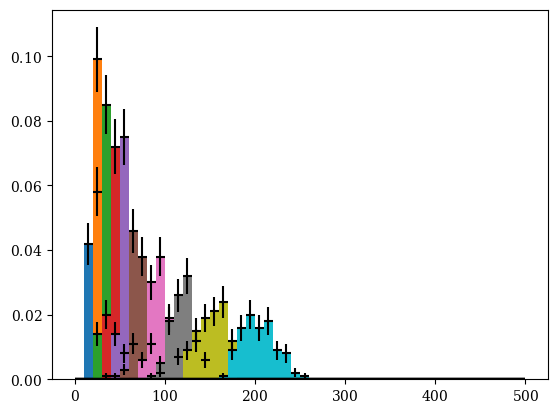

In [33]:
from numpy import ones_like
mgamma = geomspace(mingam,maxgam,lgamma,dtype=int)
sgamma = mgamma/10 #ones_like(mgamma) * 100 
rgamma = normal(mgamma,sgamma,size=(nev,lgamma)).astype(int).T
for row in rgamma:
    histogramAndPlot(row,0,500,50,normalize=True)

In [34]:
rdata  = rsimulate(rgamma,ncell,*pdfs,eff=eff,cutoff=cutoff)

In [35]:
drawScatter(rdata)

In [36]:
drawMeanStd(rdata)

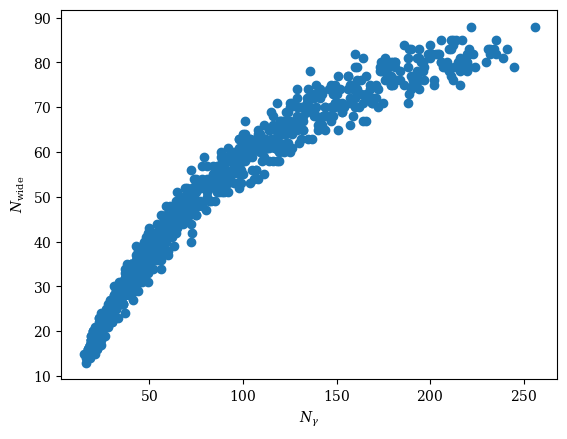

In [37]:
drawScatter(rdata,0,1)

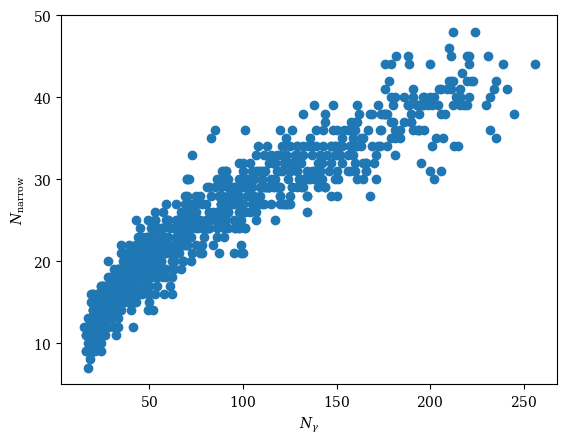

In [38]:
drawScatter(rdata,0,2)

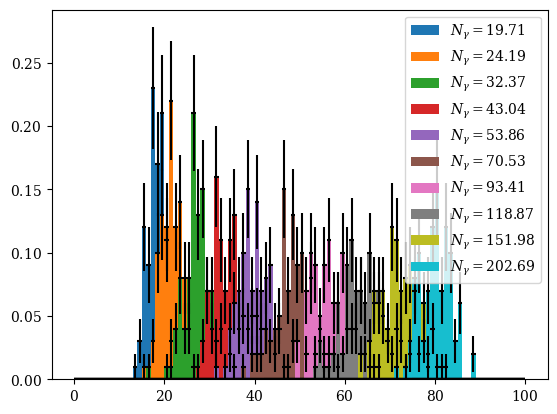

In [39]:
drawDists(rdata,1)

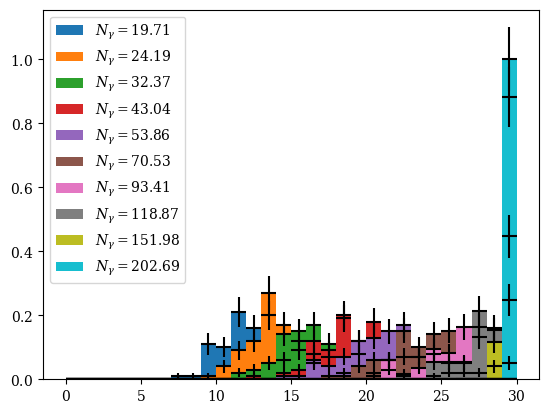

In [40]:
drawDists(rdata,2,xmax=50)